# 🚕 **Uber Ride Cancellation Analysis**

#### 📂 **Dataset**  
The dataset used for this notebook contains detailed information about Uber rides, including booking status, driver and customer actions, vehicle types, ratings, pickup and drop locations, and timestamps.

#### 🎯 **Intent**  
The intent behind this notebook is to analyze ride cancellations on Uber, understand patterns across drivers, customers, vehicle types, locations, and time, and derive actionable insights to improve operational efficiency and service reliability.

#### 📝 **Objective**  
- To analyze cancellations by driver and customer.  
- To identify trends based on vehicle type, pickup and drop locations, and peak hours.  
- To provide actionable recommendations for reducing cancellations and improving ride fulfillment rates.  

#### 📌 **Notebook Structure**  
- Importing Libraries & Dataset
- Data Cleaning & Preprocessing  
- Overview of Booking Status  
- Exploratory Data Analysis (EDA)   
- Insights


#### 👨‍💻 **Author**  
##### Yugandhar Patil

<div style="background-color:#B3E5FC; padding:10px; border-radius:5px;">
  <h2>Libraries & Dataset</h2>
</div>

In [22]:
#Importing Libaries & Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")
df= pd.DataFrame(data)

#Surpressing Warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", message=".*unique with argument.*")
warnings.filterwarnings("ignore", category=FutureWarning)


<div style="background-color:#B3E5FC; padding:10px; border-radius:5px;">
  <h2>Exploring Dataset</h2>
</div>

In [23]:
#Checking Data

df.head()

Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...                                NaN                       NaN   
1  ...                                NaN                       NaN   
2  ...                                NaN                       NaN   
3  ...                                NaN                       NaN   
4  ...                                NaN                       NaN   

   Driver Cancellation Reason Incomplete Rides  Incomplete Rides Reason  \
0                         NaN              NaN                      NaN   
1                         NaN              1.0        Vehicle Breakdown   
2                         NaN              NaN                      NaN   
3                         NaN              NaN                      NaN   
4                         NaN              NaN                      NaN   

  Booking Value  Ride Distance  Driver Ratings  Customer Rating  \
0           NaN            NaN             NaN              NaN   
1         237.0           5.73             NaN              NaN   
2         627.0          13.58             4.9              4.9   
3         416.0          34.02             4.6              5.0   
4         737.0          48.21             4.1              4.3   

   Payment Method  
0             NaN  
1             UPI  
2      Debit Card  
3             UPI  
4             UPI  

[5 rows x 21 columns]

In [24]:
#GETTING OVERVIEW Of DATA SHAPE AND COMPOSITION

df.shape

(150000, 21)

In [25]:
#DISPLAY INFO ABOUT EACH COLUMN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [26]:
#DISCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES

df.describe()

Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  139500.000000  102000.000000                      10500.0   
mean        8.456352      29.149636                          1.0   
std         3.773564       8.902577                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.300000      21.600000                          1.0   
50%         8.300000      28.800000                          1.0   
75%        11.300000      36.800000                          1.0   
max        20.000000      45.000000                          1.0   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count                    27000.0            9000.0  102000.000000   
mean                         1.0               1.0     508.295912   
std                          0.0               0.0     395.805774   
min                          1.0               1.0      50.000000   
25%                          1.0               1.0     234.000000   
50%                          1.0               1.0     414.000000   
75%                          1.0               1.0     689.000000   
max                          1.0               1.0    4277.000000   

       Ride Distance  Driver Ratings  Customer Rating  
count  102000.000000    93000.000000     93000.000000  
mean       24.637012        4.230992         4.404584  
std        14.002138        0.436871         0.437819  
min         1.000000        3.000000         3.000000  
25%        12.460000        4.100000         4.200000  
50%        23.720000        4.300000         4.500000  
75%        36.820000        4.600000         4.800000  
max        50.000000        5.000000         5.000000

In [27]:
#Checking for Duplicates

df.duplicated().sum()

0

In [28]:
#Checking for NaN Values

df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

<div style="background-color:#B3E5FC; padding:10px; border-radius:5px;">
  <h2>Data Cleaning & Pre-Processing</h2>
</div>

In [29]:
#Formating Vehicle Types

df['Vehicle Type'] = df['Vehicle Type'].replace({'eBike':'E-Bike'})

In [30]:
#Replacing NaN with mean of the Column

vtal_mean = np.nanmean(df['Avg VTAT'])

df['Avg VTAT'] = df['Avg VTAT'].fillna(8.4)


In [31]:
#Replacing NaN with mean of the Column

ctat_mean = np.nanmean(df['Avg CTAT'])

df['Avg CTAT'] = df['Avg CTAT'].fillna(29.1)


In [32]:
#Replacing NaN Values with Unknown

df['Reason for cancelling by Customer']= df['Reason for cancelling by Customer'].fillna('Unknown')
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Unknown') 
df[ 'Incomplete Rides Reason'] = df[ 'Incomplete Rides Reason'].fillna('Unknown')

In [33]:
#Replacing NaN with Mean

BookingValue_mean = np.nanmean(df['Booking Value'])
df['Booking Value'] = df['Booking Value'].fillna(BookingValue_mean)

RideDistance_mean = np.nanmean(df['Ride Distance'])
df['Ride Distance'] = df['Ride Distance'].fillna(RideDistance_mean )

DriverRatings_mean = np.nanmean(df['Driver Ratings'])
df['Driver Ratings'] = df['Driver Ratings'].fillna(DriverRatings_mean )
df['Driver Ratings'] = df['Driver Ratings'].round(1)

CustomerRating_mean = np.nanmean(df['Customer Rating'])
df['Customer Rating'] = df['Customer Rating'].fillna(CustomerRating_mean)
df['Customer Rating'] = df['Customer Rating'].round(1)

df['Payment Method'] = df['Payment Method'].fillna('Unknown')


In [34]:
#Correcting Date Time Format

df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df['Time'] = pd.to_datetime(df['Time'] ,format='%H:%M:%S')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df.head()


Date      Time    Booking ID   Booking Status   Customer ID  \
0 2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1 2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2 2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3 2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4 2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0         E-Bike          Palam Vihar            Jhilmil       8.4      29.1   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...                            Unknown                       NaN   
1  ...                            Unknown                       NaN   
2  ...                            Unknown                       NaN   
3  ...                            Unknown                       NaN   
4  ...                            Unknown                       NaN   

   Driver Cancellation Reason Incomplete Rides  Incomplete Rides Reason  \
0                     Unknown              NaN                  Unknown   
1                     Unknown              1.0        Vehicle Breakdown   
2                     Unknown              NaN                  Unknown   
3                     Unknown              NaN                  Unknown   
4                     Unknown              NaN                  Unknown   

  Booking Value  Ride Distance  Driver Ratings  Customer Rating  \
0    508.295912      24.637012             4.2              4.4   
1    237.000000       5.730000             4.2              4.4   
2    627.000000      13.580000             4.9              4.9   
3    416.000000      34.020000             4.6              5.0   
4    737.000000      48.210000             4.1              4.3   

   Payment Method  
0         Unknown  
1             UPI  
2      Debit Card  
3             UPI  
4             UPI  

[5 rows x 21 columns]

<div style="background-color:#B3E5FC; padding:10px; border-radius:5px;">
  <h2>Overview of Booking Status</h2>
</div>

In [35]:
#Checking unique values in Booking Status columns

df['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [36]:
#Calculating the total cancelled rides

total_cancelled = df['Booking Status'].isin(['Cancelled by Driver','Cancelled by Customer']).sum()
total_rides = len(df['Booking Status'])

#Calculate percentage of cancelled rides
cancelled_percentage = (total_cancelled/total_rides)*100

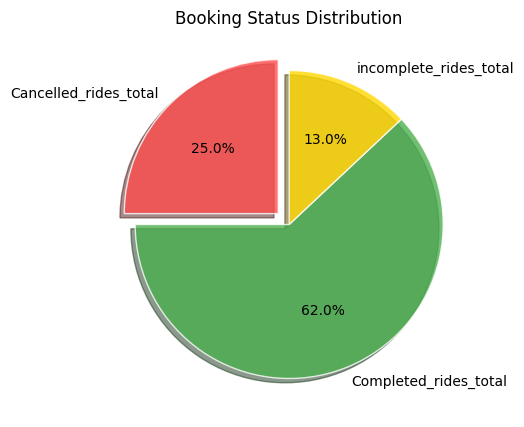

In [37]:
#Calculating Completed ,Incompleted & Cancelled Rides

Cancelled_rides_total = total_cancelled
Completed_rides_total = df['Booking Status'].isin(['Completed']).sum()
incomplete_rides_total = df['Booking Status'].isin(['No Driver Found', 'Incomplete']).sum()

#Visualizing Completed ,Incompleted & Cancelled Rides

labels = ['Cancelled_rides_total','Completed_rides_total','incomplete_rides_total']
Values = [Cancelled_rides_total,Completed_rides_total,incomplete_rides_total] 
color = ['#FF4C4C', '#4CAF50', '#FFD700']
x=[0.1,0,0]

plt.figure(figsize=(5,5))
plt.pie(Values,labels=labels,autopct='%1.1f%%',colors=color,shadow=True,wedgeprops={'edgecolor': 'white','alpha':0.8},startangle=90,explode=x)
plt.title('Booking Status Distribution')
plt.show()

<div style="background-color:#B3E5FC; padding:10px; border-radius:5px;">
  <h2>Exploratory Data Analysis (EDA)</h2>
  </div>

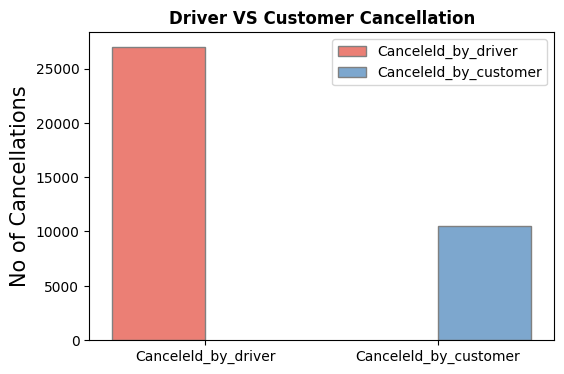

In [38]:
#Shows Driver cancellation vs Customer cancellation

Canceleld_by_driver = df['Booking Status'].isin(['Cancelled by Driver']).sum()
Canceleld_by_customer = df['Booking Status'].isin(['Cancelled by Customer']).sum()

labels = ['Canceleld_by_driver','Canceleld_by_customer']
values = [Canceleld_by_driver,Canceleld_by_customer]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=values, hue=labels , palette=['#FF6F61', '#6FA8DC'],edgecolor='grey')
plt.ylabel('No of Cancellations',size=15)
plt.title('Driver VS Customer Cancellation', fontweight='bold')
plt.show()

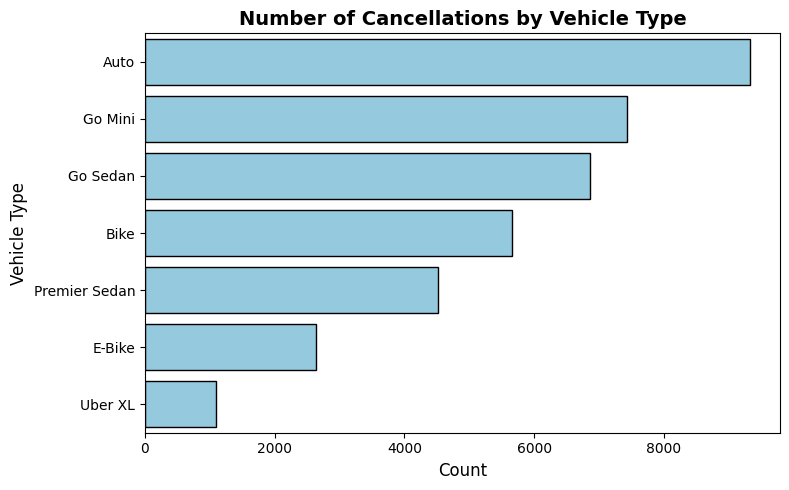

In [39]:
#Shows count of cancellation by Vehivle Type

cancelled_df = df[df['Booking Status'].isin(['Cancelled by Driver', 'Cancelled by Customer'])]


plt.figure(figsize=(8, 5))
sns.countplot(data=cancelled_df,y='Vehicle Type',color="skyblue",edgecolor="black",order=cancelled_df['Vehicle Type'].value_counts().index  )

plt.title('Number of Cancellations by Vehicle Type', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)

plt.tight_layout()
plt.show()

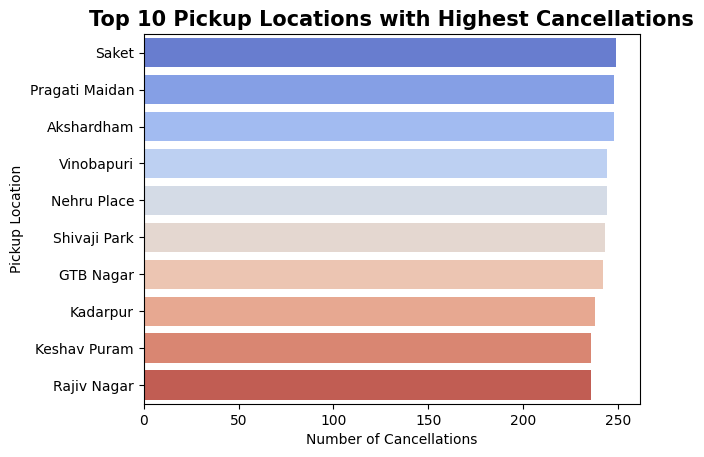

In [40]:
#Shows Top 10 Pickup locations by highest cancellation

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    sns.countplot(data=cancelled_df, y='Pickup Location',order=cancelled_df['Pickup Location'].value_counts().head(10).index, palette='coolwarm',hue=None )
    plt.title("Top 10 Pickup Locations with Highest Cancellations", fontsize=15,fontweight='bold')
    plt.xlabel("Number of Cancellations")
    plt.ylabel("Pickup Location")
    plt.show()


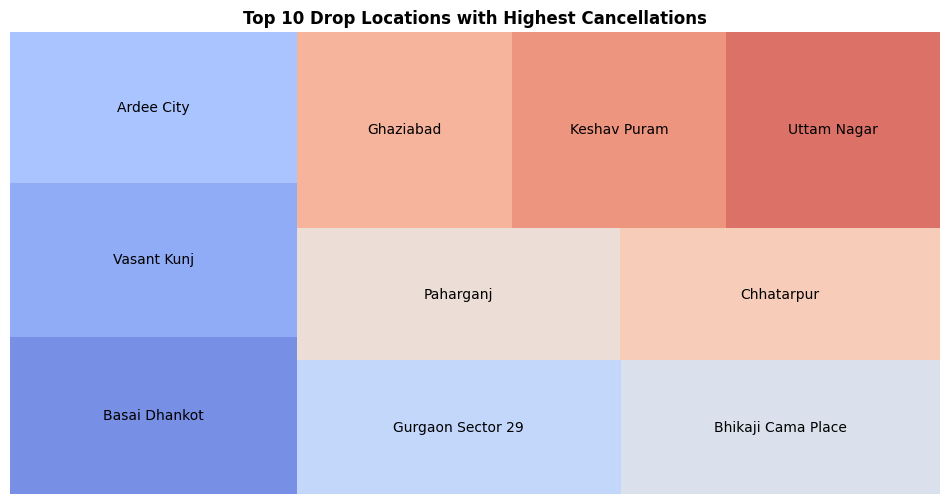

In [43]:
#Shows Top 10 Drop locations by highest cancellation

import squarify

top_drops = cancelled_df['Drop Location'].value_counts().head(10)
plt.figure(figsize=(12,6))
squarify.plot(sizes=top_drops.values, label=top_drops.index, color=sns.color_palette('coolwarm', 10), alpha=0.8)
plt.title("Top 10 Drop Locations with Highest Cancellations",fontweight='bold')
plt.axis('off')
plt.show()

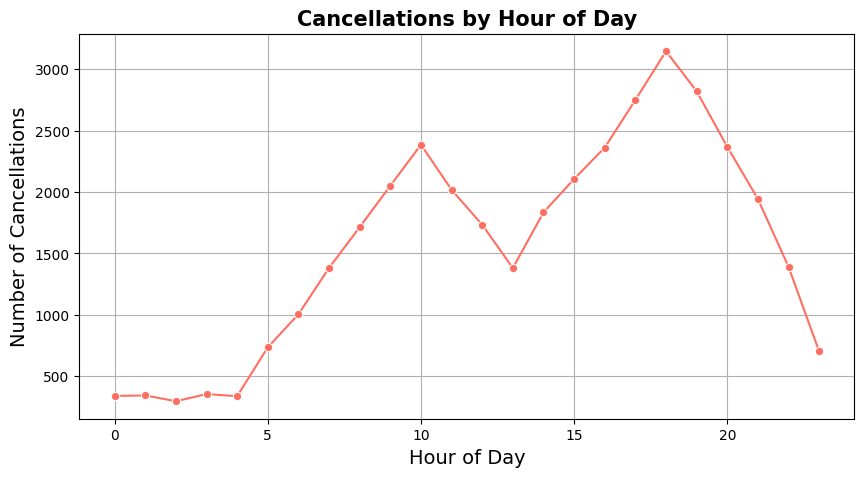

In [44]:
#Shows count of cancelation by Hour of the day

df['Hour'] = pd.to_datetime(df['Time'],format= '%H:%M:%S').dt.hour

cancelled_df = df[df['Booking Status'].isin(['Cancelled by Driver', 'Cancelled by Customer'])]

cancelled_by_hour = cancelled_df.groupby('Hour').size()


plt.figure(figsize=(10,5))
sns.lineplot(x=cancelled_by_hour.index ,y=cancelled_by_hour.values,  marker='o', color='#FF6F61')
plt.title("Cancellations by Hour of Day", fontsize=15, fontweight='bold')
plt.xlabel("Hour of Day",size=14)
plt.ylabel("Number of Cancellations",size=14)
plt.grid(True)
plt.show()



## 📌 Key Insights

### 1 Cancellation by User Type
Drivers have cancelled significantly more rides than customers, with approximately 25,000 driver cancellations compared to 10,000 customer cancellations, indicating operational or logistical factors impacting cancellations.

### 2  Vehicle Type Analysis
Auto, Go Mini, and Go Sedan are the top three vehicle categories with the highest cancellations. This trend suggests that four-wheeler rides have a higher likelihood of cancellation.

### 3 High-Cancellation Pickup Locations
Saket, Pragati Maidan, Akshardham, Vinobapuri, and Nehru Place are the pickup locations with the highest number of cancellations, highlighting areas with potential demand-supply challenges.

### 4  High-Cancellation Drop Locations
Uttam Nagar, Keshav Puram, and Ghaziabad are the drop locations most prone to cancellations, indicating possible issues with route distance, traffic, or service reliability.

### 5  Peak Cancellation Hours
The hours 10, 15, and 18 experience the most cancellations, suggesting periods of high operational stress or fluctuating demand that may require closer monitoring and resource optimization.
